# Problem Statement

## Context

Bankruptcy prediction is a crucial component of financial risk management that protects the interests of creditors, investors, and other stakeholders. Predicting a company's impending bankruptcy can help with timely interventions and smart decision-making, which can reduce losses and promote stability in the economy. Predictive modeling can benefit from the abundance of financial data provided by US corporations listed on major exchanges such as the New York Stock Exchange (NYSE) and NASDAQ, which are subject to regulatory scrutiny and strict financial reporting requirements. A firm is considered bankrupt, according to the Securities Exchange Commission (SEC), if it files for bankruptcy under the Bankruptcy Code's Chapter 11 (reorganization) or Chapter 7 (liquidation) provisions.

## Objective

A well-known financial analytics company wants to create a Bankruptcy Prediction Tool to help regulators, investors, and financial institutions assess the bankruptcy risk of US publicly traded corporations. The program will evaluate past financial data using cutting-edge machine learning algorithms to find important signs and trends related to bankruptcy. The following are this tool's main goals:

1. Bankruptcy Risk Assessment: Provide a probabilistic estimate of a company's likelihood of filing for bankruptcy within a specified time frame (e.g., one year), allowing stakeholders to make informed decisions and take preventive measures.

2. Early Warning System: Develop an early warning system that flags companies exhibiting financial distress signals, enabling proactive risk management and strategic planning.

3. Financial Health Analysis: Analyze various financial metrics to offer a comprehensive assessment of a company's financial health, highlighting areas of concern and potential vulnerabilities.

As part of the data science team in the firm, you have been provided with a dataset containing financial metrics of various companies. The task is to analyze the data and develop a predictive model using machine learning techniques to identify whether a given company is at risk of bankruptcy in the near future. The model will help the organization anticipate potential financial distress and enable proactive measures to manage risks effectively.

## Data Dictionary

1. **Company_id**: Unique identifier for each company
2. **Current_assets**: Total current assets (in millions)
3. **Cost_of_goods_sold**: Cost of goods sold (in millions)
4. **Depreciation_and_amortization**: Depreciation and amortization expenses (in millions)
5. **EBITDA**: Earnings Before Interest, Taxes, Depreciation, and Amortization (in millions)
6. **Inventory**: Value of inventory (in millions)
7. **Net_income**: Net income (profit or loss) (in millions)
8. **Total_receivables**: Total receivables (in millions)
9. **Market_value**: Market value of the company (in millions)
10. **Net_sales**: Net sales or revenue (in millions)
11. **Total_assets**: Total assets (in millions)
12. **Total_long_term_debt**: Total long-term debt (in millions)
13. **EBIT**: Earnings Before Interest and Taxes (in millions)
14. **Gross_profit**: Gross profit (in millions)
15. **Total_current_liabilities**: Total current liabilities (in millions)
16. **Retained_earnings**: Retained earnings (in millions)
17. **Total_revenue**: Total revenue (in millions)
18. **Total_liabilities**: Total liabilities (in millions)
19. **Total_operating_expenses**: Total operating expenses (in millions)
20. **Bankrupt**: Bankruptcy status (1 = Bankrupt, 0 = Not Bankrupt)

# **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python Course/Bankruptcy_Data.csv')  ##  Fill the blank to read the data


In [ ]:
df.head()

,Company_id,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
0,C_3,6.494,15.700,0.761,0.381,3.488,-1.738,2.677,2.9667,24.051,8.635,3.873,-0.380,8.351,2.045,-8.922,24.051,5.918,23.670,0
1,C_6,6540.000,19419.000,1404.000,-456.000,822.000,-1762.000,1414.000,3445.0155,18963.000,32841.000,9834.000,-1860.000,-456.000,7512.000,4042.000,18963.000,27468.000,19419.000,1
2,C_8,189.471,125.059,11.600,44.563,48.423,21.354,49.409,626.5350,232.808,310.252,11.428,32.963,107.749,37.097,29.890,232.808,55.131,188.245,0
3,C_12,34.617,104.017,3.165,5.766,13.184,0.812,11.964,15.1588,117.326,90.941,35.163,2.601,13.309,24.589,18.274,117.326,68.162,111.560,0
4,C_14,90.558,148.628,0.909,7.759,37.818,4.245,41.500,65.1701,178.154,105.173,0.671,6.850,29.526,35.299,37.242,178.154,35.970,170.395,1


# Data Overview

In [ ]:
df.head(5) ##  Complete the code to view top 5 rows of the data

,Company_id,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
0,C_3,6.494,15.700,0.761,0.381,3.488,-1.738,2.677,2.9667,24.051,8.635,3.873,-0.380,8.351,2.045,-8.922,24.051,5.918,23.670,0
1,C_6,6540.000,19419.000,1404.000,-456.000,822.000,-1762.000,1414.000,3445.0155,18963.000,32841.000,9834.000,-1860.000,-456.000,7512.000,4042.000,18963.000,27468.000,19419.000,1
2,C_8,189.471,125.059,11.600,44.563,48.423,21.354,49.409,626.5350,232.808,310.252,11.428,32.963,107.749,37.097,29.890,232.808,55.131,188.245,0
3,C_12,34.617,104.017,3.165,5.766,13.184,0.812,11.964,15.1588,117.326,90.941,35.163,2.601,13.309,24.589,18.274,117.326,68.162,111.560,0
4,C_14,90.558,148.628,0.909,7.759,37.818,4.245,41.500,65.1701,178.154,105.173,0.671,6.850,29.526,35.299,37.242,178.154,35.970,170.395,1


In [ ]:
df.tail(5) ##  Complete the code to view last 5 rows of the data

,Company_id,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
1978,C_7172,0.042,0.062,0.000,-0.048,0.000,-0.047,0.000,1.0813,0.062,0.046,0.000,-0.048,0.000,0.063,-0.051,0.062,0.063,0.110,0
1979,C_7176,6.385,11.054,0.201,0.421,0.000,0.175,3.678,23.9363,13.788,6.708,0.020,0.220,2.734,3.136,1.714,13.788,3.156,13.367,0
1980,C_7180,1135.848,1370.382,71.231,187.991,982.000,11.442,93.704,1626.4270,2517.639,1950.615,932.022,116.760,1147.257,693.749,-205.294,2517.639,1662.044,2329.648,0
1981,C_7186,9.453,7.894,0.467,-1.672,0.880,-3.047,1.049,15.6110,6.222,16.247,1.500,-2.139,-1.672,3.237,-9.012,6.222,4.737,7.894,0
1982,C_7288,2.753,5.436,0.679,-0.610,1.419,-5.163,1.073,5.9271,8.627,4.072,3.234,-1.289,3.191,3.144,-24.875,8.627,6.378,9.237,0


In [ ]:
df.shape ##  Complete the code to view dimensions of the data

(1983, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company_id                     1983 non-null   object 
 1   Current_assets                 1983 non-null   float64
 2   Cost_of_goods_sold             1983 non-null   float64
 3   Depreciation_and_amortization  1983 non-null   float64
 4   EBITDA                         1983 non-null   float64
 5   Inventory                      1983 non-null   float64
 6   Net_income                     1983 non-null   float64
 7   Total_receivables              1983 non-null   float64
 8   Market_value                   1983 non-null   float64
 9   Net_sales                      1983 non-null   float64
 10  Total_assets                   1983 non-null   float64
 11  Total_long_term_debt           1983 non-null   float64
 12  EBIT                           1983 non-null   f

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
#checking for no. of unique values
#df._______ ##  Complete the code to check unique entries in the data
print(df.nunique())

Company_id                       1983
Current_assets                   1966
Cost_of_goods_sold               1969
Depreciation_and_amortization    1850
EBITDA                           1967
Inventory                        1452
Net_income                       1949
Total_receivables                1847
Market_value                     1982
Net_sales                        1964
Total_assets                     1971
Total_long_term_debt             1452
EBIT                             1963
Gross_profit                     1968
Total_current_liabilities        1960
Retained_earnings                1974
Total_revenue                    1964
Total_liabilities                1962
Total_operating_expenses         1973
Bankrupt                            2
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_assets,1983.0,485.485038,1790.167597,0.0020,14.1920,63.2820,234.6860,36105.0000
Cost_of_goods_sold,1983.0,1024.313261,4316.517260,0.0000,14.8690,72.3840,338.1010,76809.0000
Depreciation_and_amortization,1983.0,86.553624,400.228725,0.0000,1.4920,6.4380,30.2085,9338.0000
EBITDA,1983.0,162.429048,880.011401,-5743.0000,-2.5165,5.3120,55.9780,18632.0000
Inventory,1983.0,119.278526,506.207801,0.0000,0.0000,5.7020,44.2140,8923.0000
Net_income,1983.0,-53.004835,1536.719467,-56121.9000,-14.9175,-0.7970,9.5450,8560.0000
Total_receivables,1983.0,171.701946,882.459285,0.0000,2.4410,13.8250,61.8435,28813.0000
Market_value,1983.0,1630.979822,8159.299586,0.0384,18.2261,96.3835,588.2171,180090.4065
Net_sales,1983.0,1426.305833,5627.381670,0.0020,23.9920,115.0030,535.4695,97863.0000
Total_assets,1983.0,1641.765901,6932.946945,0.0040,29.4450,131.4280,574.6155,165282.0000


In [ ]:
df.drop(['Company_id'], axis = 1, inplace = True)

#Exploratory Data Analysis

## Univariate Analysis

In [ ]:
  #df["Bankrupt"]._______   ## Complete the code to check unique values in the mentioned column
  #df.Bankrupt.unique()
  df["Bankrupt"].value_counts(normalize=True)

,proportion
Bankrupt,
0,0.791225
1,0.208775


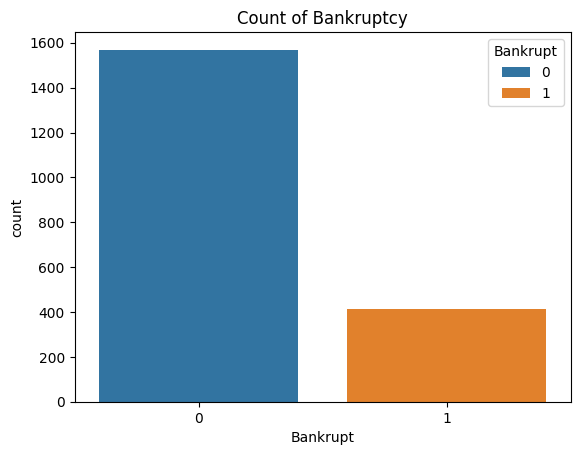

In [ ]:
#Plotting a countplot for the target variable
sns.countplot(x = "Bankrupt", data = df, hue = 'Bankrupt')   ## Complete the code to get a countplot of the mentionedd column.
plt.title('Count of Bankruptcy')
plt.show()

In [ ]:
#Percentage of defaulters
(df.Bankrupt.sum()/len(df)) * 100

20.87745839636914

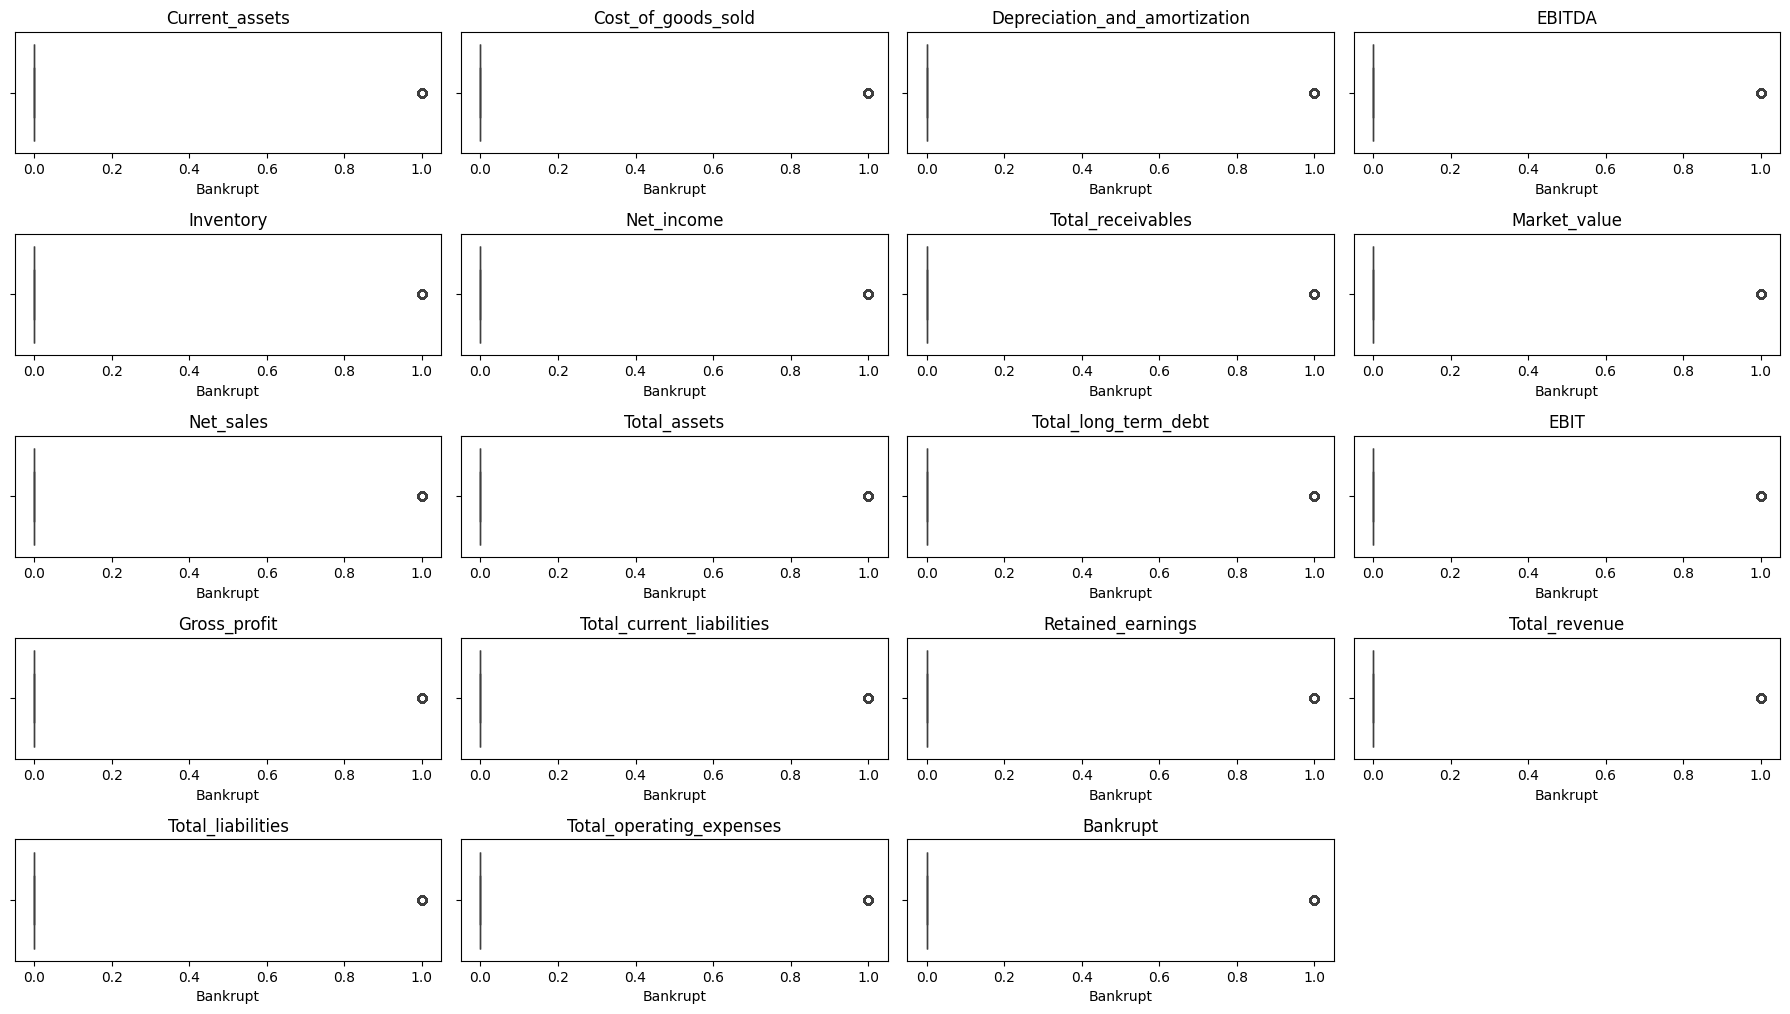

In [ ]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
#sns.boxplot(data=_______, x=_______)  ## Complete the code to get boxplots for all numerical columns
    sns.boxplot(data=df, x="Bankrupt")  ## Complete the code to get boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)


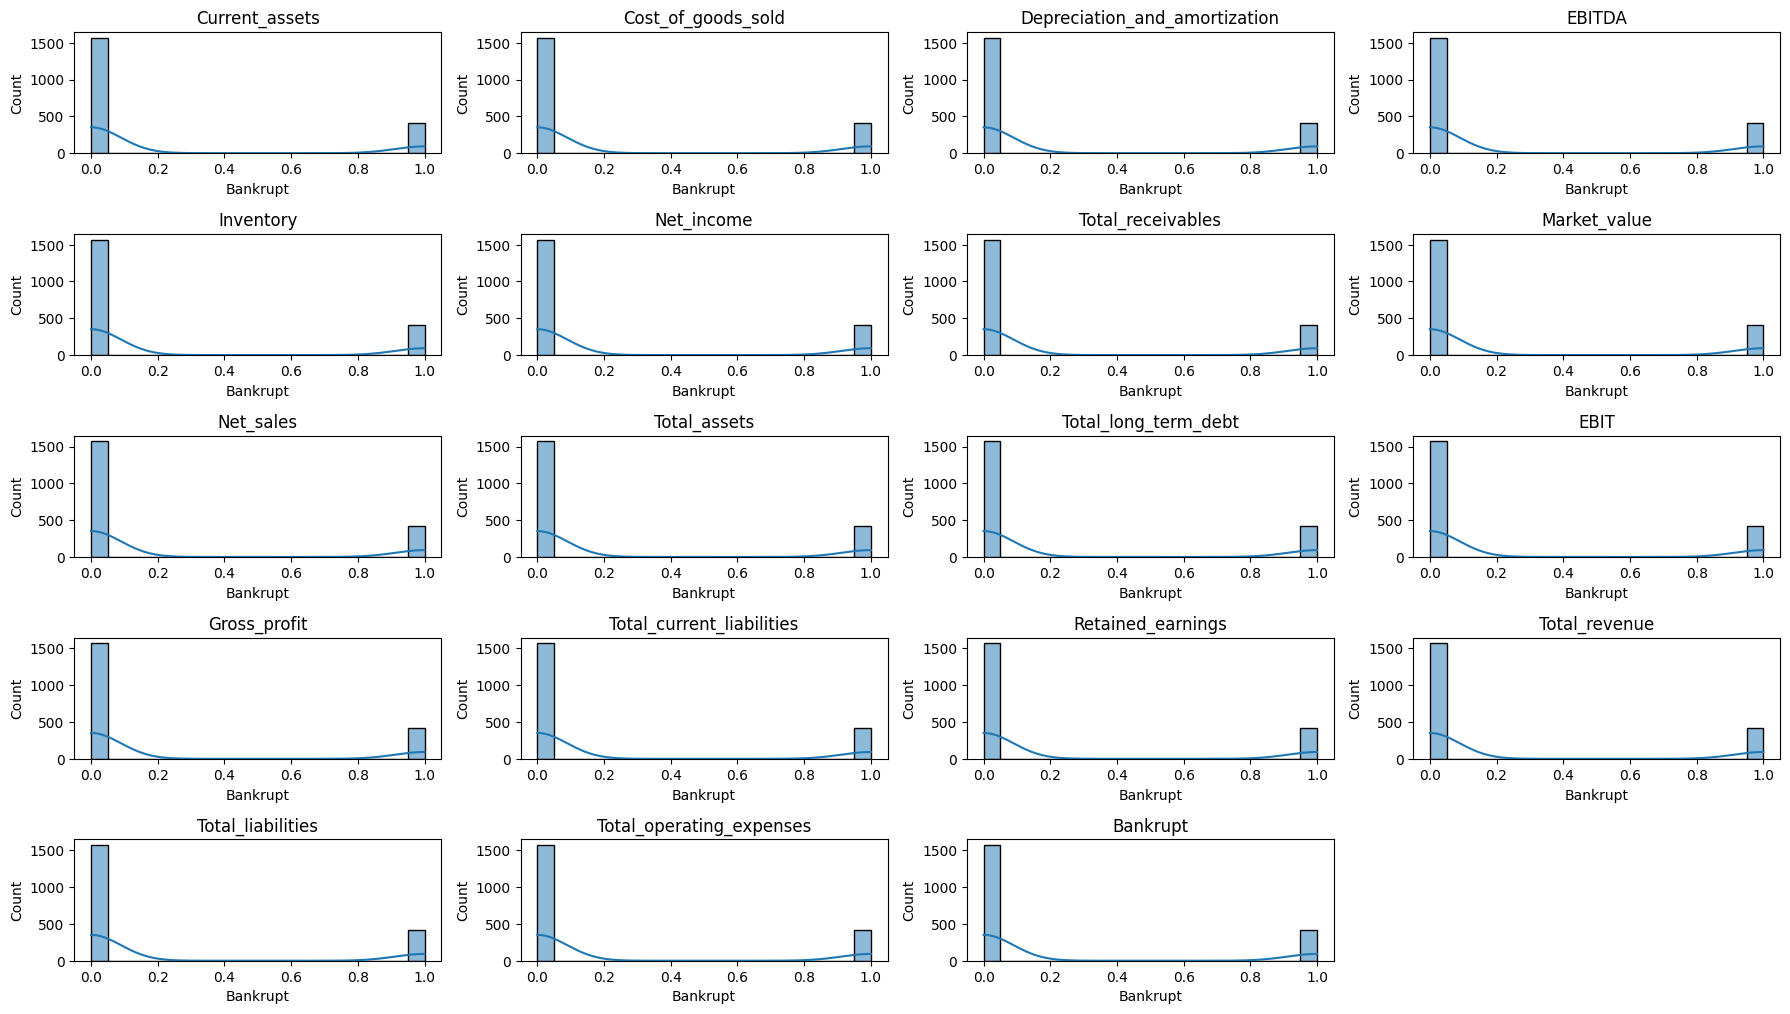

In [ ]:
#Get distplot for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.histplot(data=df, x="Bankrupt", kde=True, bins=20, edgecolor='black')  ## Complete the code to get histplot for all numerical columns in the data
    plt.tight_layout()
    plt.title(variable)


## Bivariate Analysis

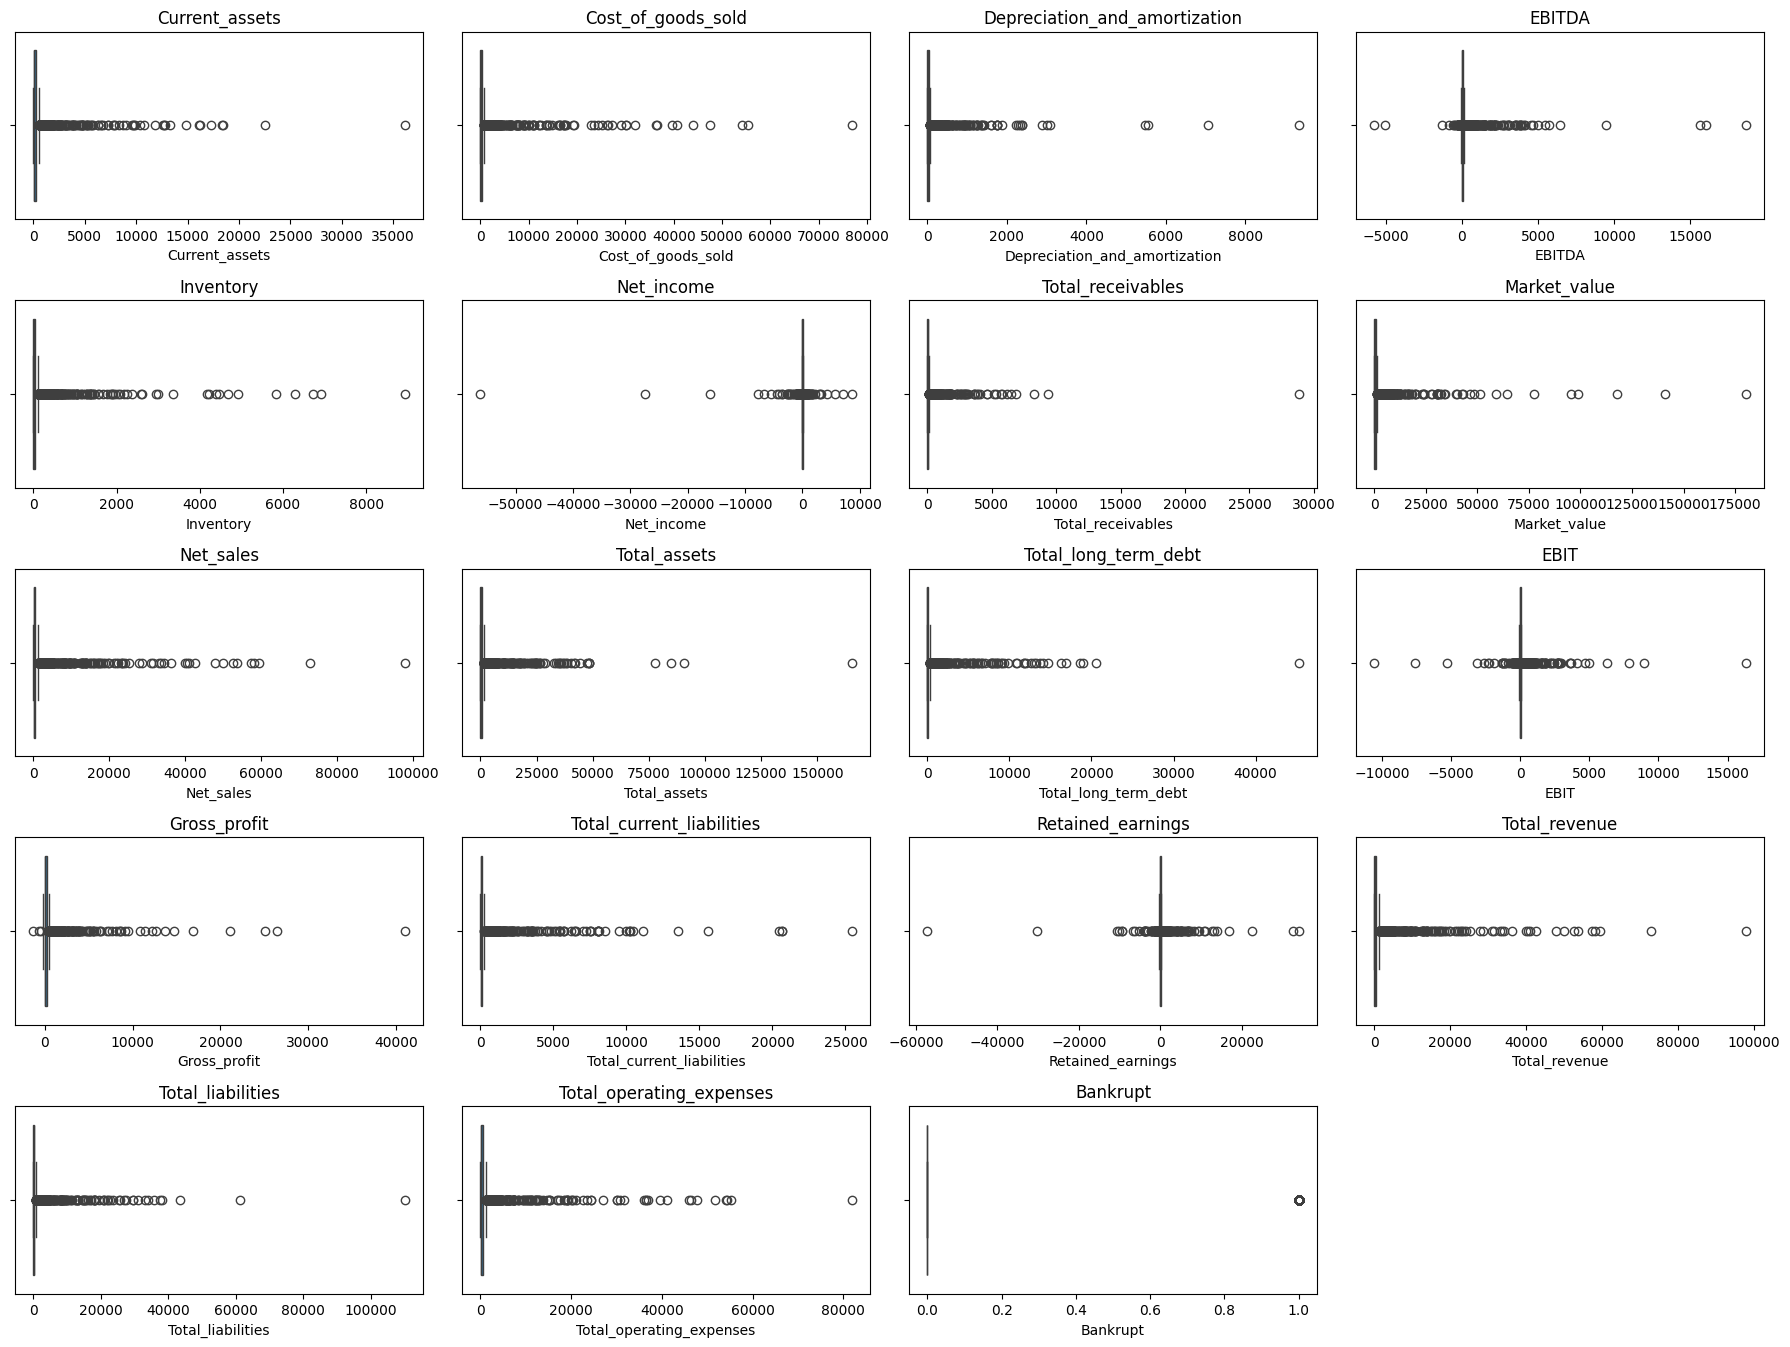

In [ ]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 40))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
#   sns.boxplot(_______)  ## Complete the code to get boxplot of all variables with Default column in the data
    sns.boxplot(x=variable,data=df)
    plt.tight_layout()
    plt.title(variable)
plt.show()

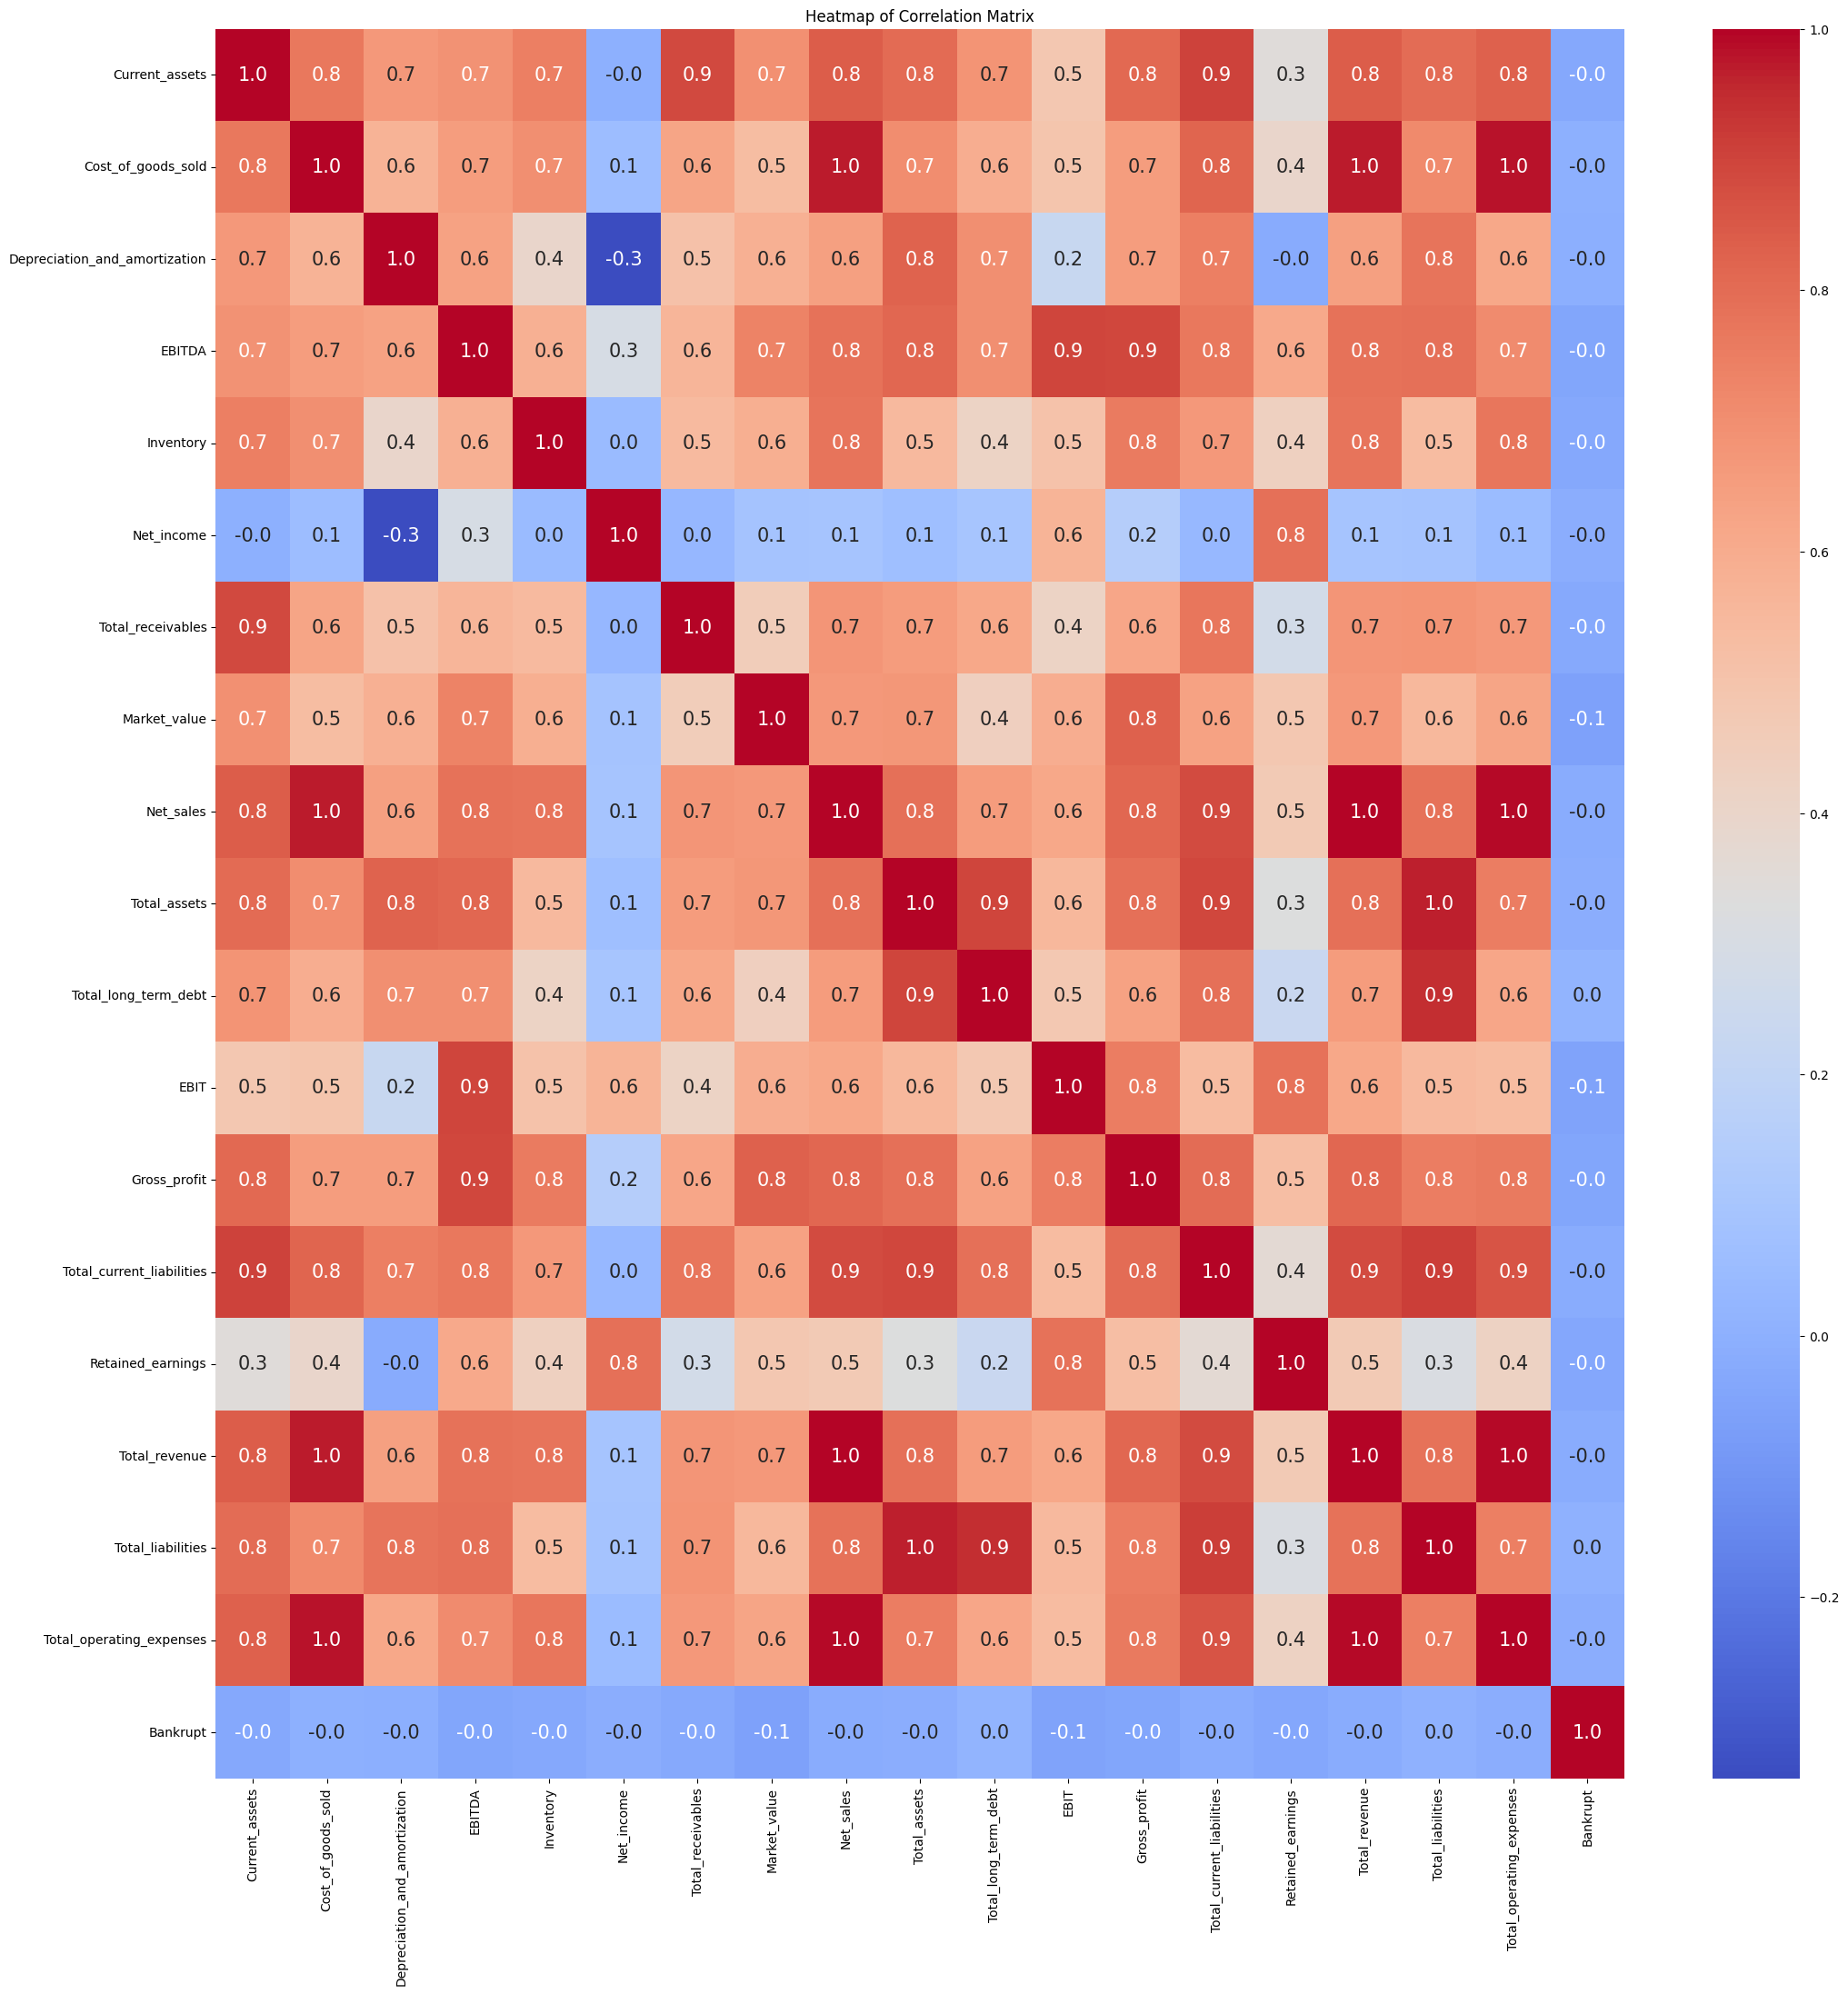

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
corr_matrix

,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses,Bankrupt
Current_assets,1.000000,0.764695,0.666402,0.687359,0.744692,-0.000831,0.888061,0.693776,0.839917,0.805285,0.684081,0.484864,0.808335,0.902681,0.346057,0.839917,0.800780,0.829262,-0.030286
Cost_of_goods_sold,0.764695,1.000000,0.571812,0.653193,0.701346,0.058542,0.628522,0.531706,0.971337,0.706130,0.595583,0.496034,0.651769,0.821968,0.397545,0.971337,0.714898,0.984107,-0.003041
Depreciation_and_amortization,0.666402,0.571812,1.000000,0.636219,0.396143,-0.338753,0.511850,0.582133,0.643497,0.824857,0.701741,0.228906,0.653697,0.744939,-0.021363,0.643497,0.775744,0.615928,-0.006720
EBITDA,0.687359,0.653193,0.636219,1.000000,0.582503,0.295105,0.561993,0.736475,0.781311,0.812891,0.698284,0.896658,0.894235,0.765496,0.610048,0.781311,0.785947,0.707553,-0.045473
Inventory,0.744692,0.701346,0.396143,0.582503,1.000000,0.043190,0.542657,0.588801,0.775437,0.546271,0.418482,0.507648,0.757644,0.669996,0.431274,0.775437,0.537230,0.774822,-0.031479
Net_income,-0.000831,0.058542,-0.338753,0.295105,0.043190,1.000000,0.030464,0.089075,0.092535,0.067055,0.095780,0.566739,0.151965,0.037280,0.790055,0.092535,0.086413,0.052519,-0.013772
Total_receivables,0.888061,0.628522,0.511850,0.561993,0.542657,0.030464,1.000000,0.452692,0.676703,0.659380,0.614947,0.415372,0.620854,0.772982,0.277845,0.676703,0.683374,0.666667,-0.030048
Market_value,0.693776,0.531706,0.582133,0.736475,0.588801,0.089075,0.452692,1.000000,0.667264,0.674433,0.435396,0.595193,0.827678,0.638919,0.482765,0.667264,0.553292,0.625086,-0.058656
Net_sales,0.839917,0.971337,0.643497,0.781311,0.775437,0.092535,0.676703,0.667264,1.000000,0.788975,0.655816,0.616551,0.813369,0.881054,0.469773,1.000000,0.783842,0.993875,-0.015970
Total_assets,0.805285,0.706130,0.824857,0.812891,0.546271,0.067055,0.659380,0.674433,0.788975,1.000000,0.896229,0.552326,0.789130,0.891135,0.329346,0.788975,0.964035,0.749359,-0.009563


# Data Preprocessing

## Outliers Check

In [ ]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  ## Fill the blank with correct value for getting lower_bound
    upper_bound = Q3 + 1.5 * IQR  ## Fill the blank with correct value for getting upper_bound

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Current_assets,279
1,Cost_of_goods_sold,311
2,Depreciation_and_amortization,302
3,EBITDA,335
4,Inventory,298
5,Net_income,485
6,Total_receivables,307
7,Market_value,278
8,Net_sales,296
9,Total_assets,310


In [ ]:
print(df.columns)

Index(['Current_assets', 'Cost_of_goods_sold', 'Depreciation_and_amortization',
       'EBITDA', 'Inventory', 'Net_income', 'Total_receivables',
       'Market_value', 'Net_sales', 'Total_assets', 'Total_long_term_debt',
       'EBIT', 'Gross_profit', 'Total_current_liabilities',
       'Retained_earnings', 'Total_revenue', 'Total_liabilities',
       'Total_operating_expenses', 'Bankrupt'],
      dtype='object')


## Data Preparation for Modeling

In [ ]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Bankrupt'], axis = 1)
df_y = df['Bankrupt']

In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.25, random_state=42, stratify = df_y)  ## Complete the code to split the data into train and test in the ratio 75:25

## Missing Values Detection

In [ ]:
# Check missing values
X_train.isnull().sum()  ## Complete the code to get the number of null or NaN values in each column

,0
Current_assets,0
Cost_of_goods_sold,0
Depreciation_and_amortization,0
EBITDA,0
Inventory,0
Net_income,0
Total_receivables,0
Market_value,0
Net_sales,0
Total_assets,0


In [ ]:
# Check missing values
X_test.isna().sum()
#X_test.isna().sum()

,0
Current_assets,0
Cost_of_goods_sold,0
Depreciation_and_amortization,0
EBITDA,0
Inventory,0
Net_income,0
Total_receivables,0
Market_value,0
Net_sales,0
Total_assets,0


In [ ]:
print("No. of missing values in training data:", X_train.isnull().sum().sum())
print("No. of missing values in test data:", X_test.isnull().sum().sum())

No. of missing values in training data: 0
No. of missing values in test data: 0


## Scaling the Data

In [ ]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)  ## Complete the code to scale X_test to the same scale as X_train
#X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
#X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)  ## Complete the code to scale X_test to the same scale as X_train

In [ ]:
X_train_scaled.head()

,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,-0.159768,-0.142125,-0.234780,-0.063513,-0.113882,0.099548,-0.072098,-0.091104,-0.132506,-0.167604,-0.217799,0.022548,-0.074157,-0.203199,0.040036,-0.132506,-0.224333,-0.139028
1,-0.274514,-0.236003,-0.261220,-0.199194,-0.237175,0.000488,-0.191910,-0.198944,-0.253588,-0.267951,-0.263127,-0.139896,-0.232395,-0.251483,-0.120986,-0.253588,-0.262956,-0.253171
2,-0.175941,-0.160988,-0.136617,-0.075109,-0.078514,0.054720,-0.122962,-0.138230,-0.155378,-0.172370,-0.173698,-0.035852,-0.101208,-0.162482,0.020665,-0.155378,-0.186075,-0.162921
3,-0.274668,-0.236195,-0.261416,-0.198389,-0.237910,0.001816,-0.192215,-0.199350,-0.253852,-0.267943,-0.263127,-0.138775,-0.232771,-0.252070,-0.121302,-0.253852,-0.263176,-0.253603
4,-0.272938,-0.235566,-0.252166,-0.220011,-0.234932,-0.043588,-0.192093,-0.190211,-0.253589,-0.264987,-0.257469,-0.170631,-0.233494,-0.250024,-0.189633,-0.253589,-0.260105,-0.249713


In [ ]:
X_test_scaled.head()

,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,1.425256,0.449321,0.881451,0.677876,1.216180,0.052062,0.934954,0.918450,0.766404,0.525205,0.119708,0.040601,1.220602,0.734990,0.595617,0.766404,0.223700,0.718298
1,-0.251530,-0.265172,-0.134796,-0.139359,-0.292522,0.052347,-0.205328,-0.237099,-0.261113,-0.162123,-0.151318,-0.048820,-0.190231,-0.185111,0.025272,-0.261113,-0.150855,-0.267822
2,-0.264041,-0.273925,-0.171358,-0.139685,-0.292006,0.072136,-0.227476,-0.236993,-0.277003,-0.165709,-0.150847,-0.017327,-0.216670,-0.200485,0.040794,-0.277003,-0.154819,-0.286177
3,-0.253625,-0.266170,-0.167315,-0.115655,-0.264138,0.076533,-0.212611,-0.211926,-0.262184,-0.156802,-0.145093,0.007834,-0.191192,-0.200232,0.064097,-0.262184,-0.151381,-0.275043
4,1.149405,0.809938,0.197450,1.001746,3.104173,0.207898,1.289566,1.016863,1.149710,0.482750,0.231647,1.023701,1.557520,0.695262,1.373465,1.149710,0.353642,1.081366


#Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
X_train_with_intercept.head()

,const,Current_assets,Cost_of_goods_sold,Depreciation_and_amortization,EBITDA,Inventory,Net_income,Total_receivables,Market_value,Net_sales,Total_assets,Total_long_term_debt,EBIT,Gross_profit,Total_current_liabilities,Retained_earnings,Total_revenue,Total_liabilities,Total_operating_expenses
0,1.0,-0.159768,-0.142125,-0.234780,-0.063513,-0.113882,0.099548,-0.072098,-0.091104,-0.132506,-0.167604,-0.217799,0.022548,-0.074157,-0.203199,0.040036,-0.132506,-0.224333,-0.139028
1,1.0,-0.274514,-0.236003,-0.261220,-0.199194,-0.237175,0.000488,-0.191910,-0.198944,-0.253588,-0.267951,-0.263127,-0.139896,-0.232395,-0.251483,-0.120986,-0.253588,-0.262956,-0.253171
2,1.0,-0.175941,-0.160988,-0.136617,-0.075109,-0.078514,0.054720,-0.122962,-0.138230,-0.155378,-0.172370,-0.173698,-0.035852,-0.101208,-0.162482,0.020665,-0.155378,-0.186075,-0.162921
3,1.0,-0.274668,-0.236195,-0.261416,-0.198389,-0.237910,0.001816,-0.192215,-0.199350,-0.253852,-0.267943,-0.263127,-0.138775,-0.232771,-0.252070,-0.121302,-0.253852,-0.263176,-0.253603
4,1.0,-0.272938,-0.235566,-0.252166,-0.220011,-0.234932,-0.043588,-0.192093,-0.190211,-0.253589,-0.264987,-0.257469,-0.170631,-0.233494,-0.250024,-0.189633,-0.253589,-0.260105,-0.249713


In [ ]:
y_train.reset_index(inplace = True, drop = True)

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit(method = 'bfgs')
print(LogisticReg.summary())

         Current function value: 0.497065
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 1487
Model:                          Logit   Df Residuals:                     1472
Method:                           MLE   Df Model:                           14
Date:                Sun, 25 Aug 2024   Pseudo R-squ.:                 0.02903
Time:                        15:20:04   Log-Likelihood:                -739.14
converged:                      False   LL-Null:                       -761.24
Covariance Type:            nonrobust   LLR p-value:                 5.497e-05
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.49

### Logistic Regression Model - Training Performance

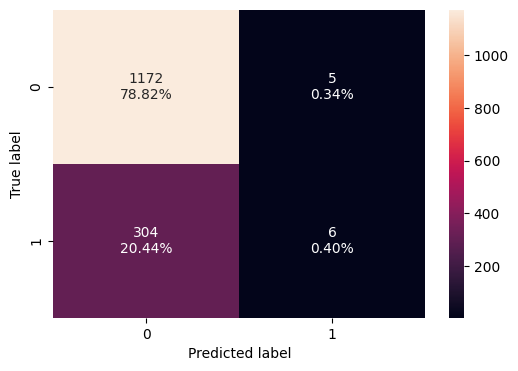

In [ ]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [ ]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

,Accuracy,Recall,Precision,F1
0,0.792199,0.019355,0.545455,0.037383


### Logistic Regression Model - Test Performance

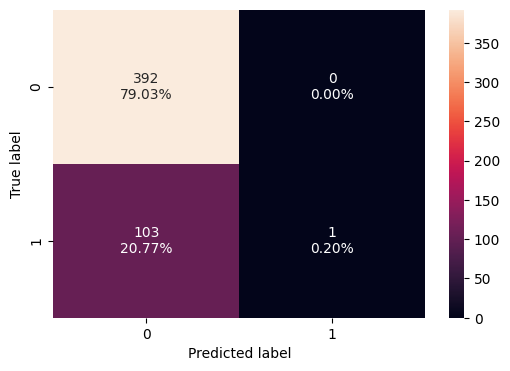

In [ ]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to create confusion matrix for test data
#model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

In [ ]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to check performance on test data
logistic_regression_perf_test

,Accuracy,Recall,Precision,F1
0,0.792339,0.009615,1.0,0.019048


## Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_model = rf_classifier.fit(X_train, y_train)
rf_model

RandomForestClassifier(random_state=42)

### Random Forest Model - Training Performance

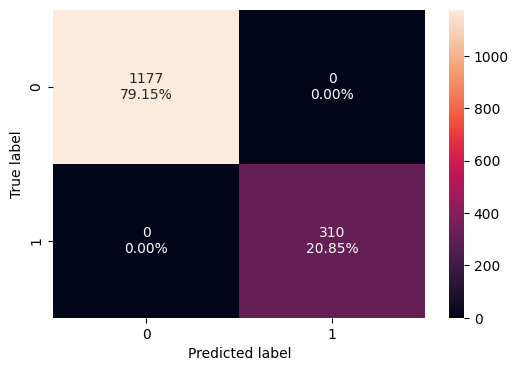

In [ ]:
model_confusion_matrix(rf_model, X_train, y_train)

In [ ]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Random Forest Model - Test Performance

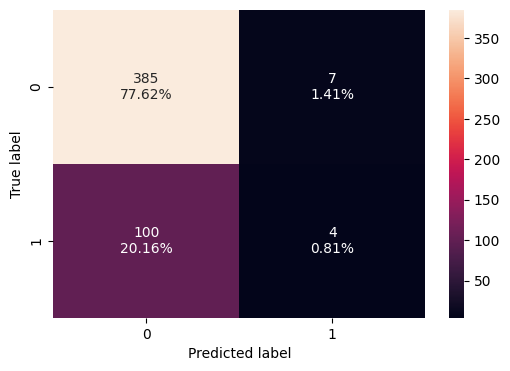

In [ ]:
model_confusion_matrix(rf_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.784274,0.038462,0.363636,0.069565


# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  ## Complete the code to calculate VIF for the scaled X_train data

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


,Variable,VIF
0,Current_assets,30.238097
1,Cost_of_goods_sold,inf
2,Depreciation_and_amortization,inf
3,EBITDA,inf
4,Inventory,5.994164
5,Net_income,7.412527
6,Total_receivables,10.476996
7,Market_value,8.578420
8,Net_sales,inf
9,Total_assets,27.446399


In [ ]:
# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping Cost_of_goods_sold due to high VIF
Dropping Depreciation_and_amortization due to high VIF
Dropping EBITDA due to high VIF
Dropping Net_sales due to high VIF
Dropping Total_revenue due to high VIF
Dropping Total_liabilities due to high VIF
Dropping Current_assets due to high VIF
Dropping Gross_profit due to high VIF
Dropping Total_assets due to high VIF
Dropping Total_current_liabilities due to high VIF
Dropping EBIT due to high VIF


In [ ]:
print(f"There are {X_train_scaled.shape[0]} records in the Train Dataset and {X_test_scaled.shape[0]} records in the Test Dataset. \nBoth the datsets have {X_train_scaled.shape[1]} variables.")

There are 1487 records in the Train Dataset and 496 records in the Test Dataset. 
Both the datsets have 7 variables.


In [ ]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit(method = 'bfgs')
print(LogisticReg_improved.summary())

         Current function value: 0.501131
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 1487
Model:                          Logit   Df Residuals:                     1479
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Aug 2024   Pseudo R-squ.:                 0.02109
Time:                        15:24:39   Log-Likelihood:                -745.18
converged:                      False   LL-Null:                       -761.24
Covariance Type:            nonrobust   LLR p-value:                 3.879e-05
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4801      0.084  

In [ ]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.215

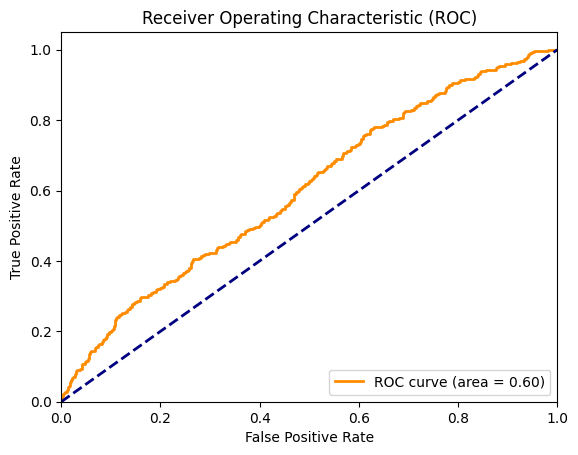

In [ ]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  ## Complete the code to get roc_auc score
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

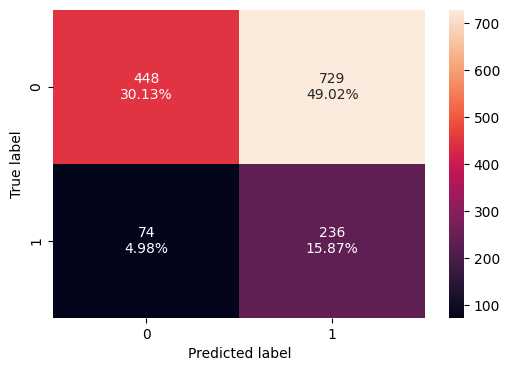

In [ ]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [ ]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.459987,0.76129,0.24456,0.370196


### Logistic Regression Performance - Test Set

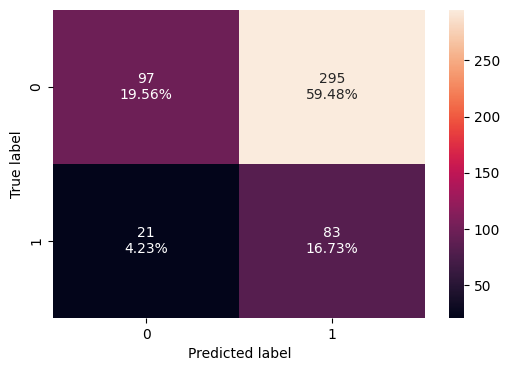

In [ ]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to create confusion matrix for test data

In [ ]:
logistic_regression_tuned_perf_test = model_performance_classification(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit
    )  ## Complete the code to check performance on test data
logistic_regression_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.362903,0.798077,0.219577,0.344398


## Model Performance Improvement - Random Forest

**Note**: The parameter grid provided below is a sample grid. It can be updated if required.

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [5, 6, 7, 8],    # Maximum depth of the trees
    'min_samples_split': [2, 4, 5, 7, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7, 9],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [ ]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 5
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 9
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

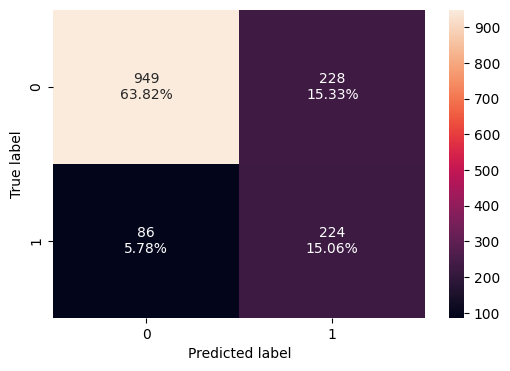

In [ ]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)  ## Complete the code to create confusion matrix for training data

In [ ]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)  ## Complete the code to check performance on training data
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.788837,0.722581,0.495575,0.587927


### Random Forest Performance - Test Set

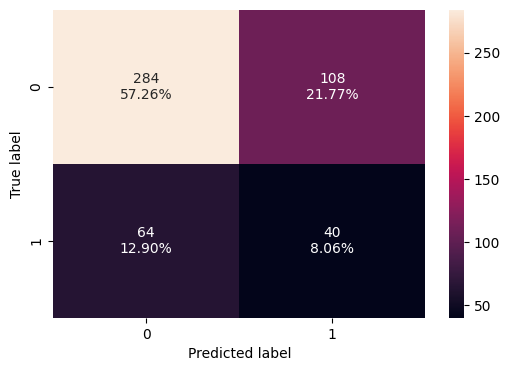

In [ ]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [ ]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.653226,0.384615,0.27027,0.31746


# Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.792199,0.459987,1.0,0.788837
Recall,0.019355,0.761290,1.0,0.722581
Precision,0.545455,0.244560,1.0,0.495575
F1,0.037383,0.370196,1.0,0.587927


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.792339,0.362903,0.784274,0.653226
Recall,0.009615,0.798077,0.038462,0.384615
Precision,1.000000,0.219577,0.363636,0.270270
F1,0.019048,0.344398,0.069565,0.317460


## Feature Importance for Best Model

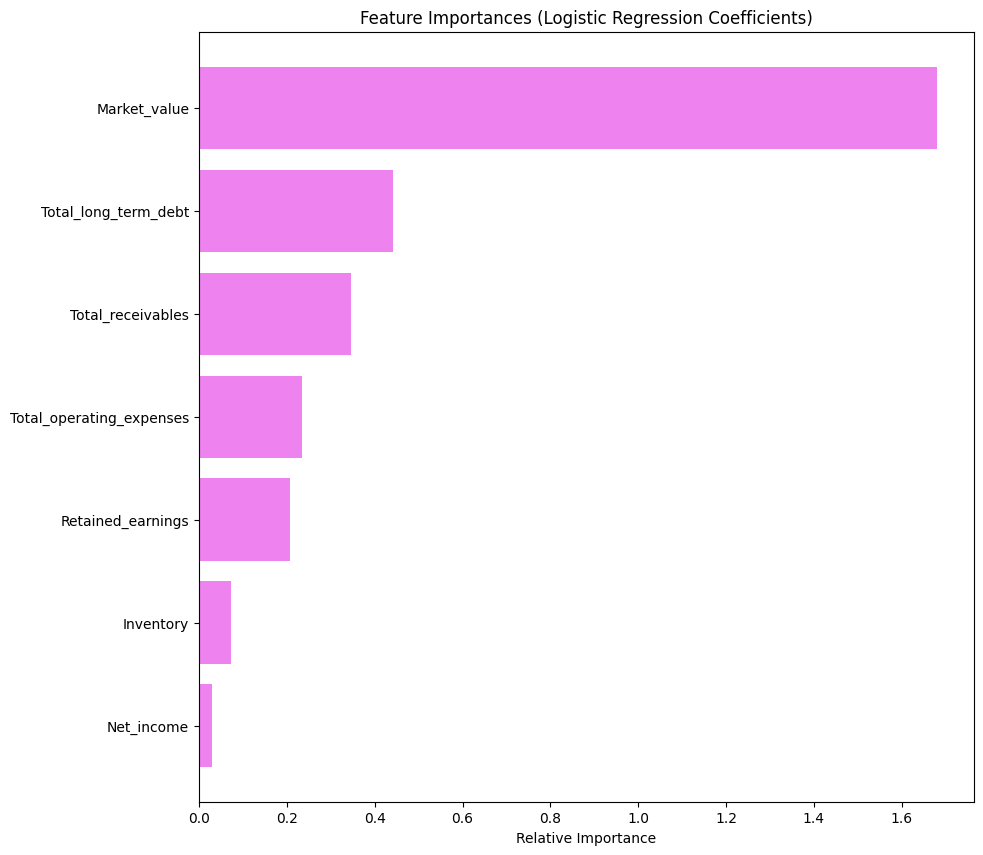

In [ ]:
# Uncomment and run to check feature importance for Improved Logistic Regression model

coefficients = LogisticReg_improved.params.values[1:]  # Exclude the constant term
relative_importance = np.abs(coefficients)
feature_names = X_train_new_with_intercept.columns[1:]
indices = np.argsort(relative_importance)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances (Logistic Regression Coefficients)")
plt.barh(range(len(indices)), relative_importance[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

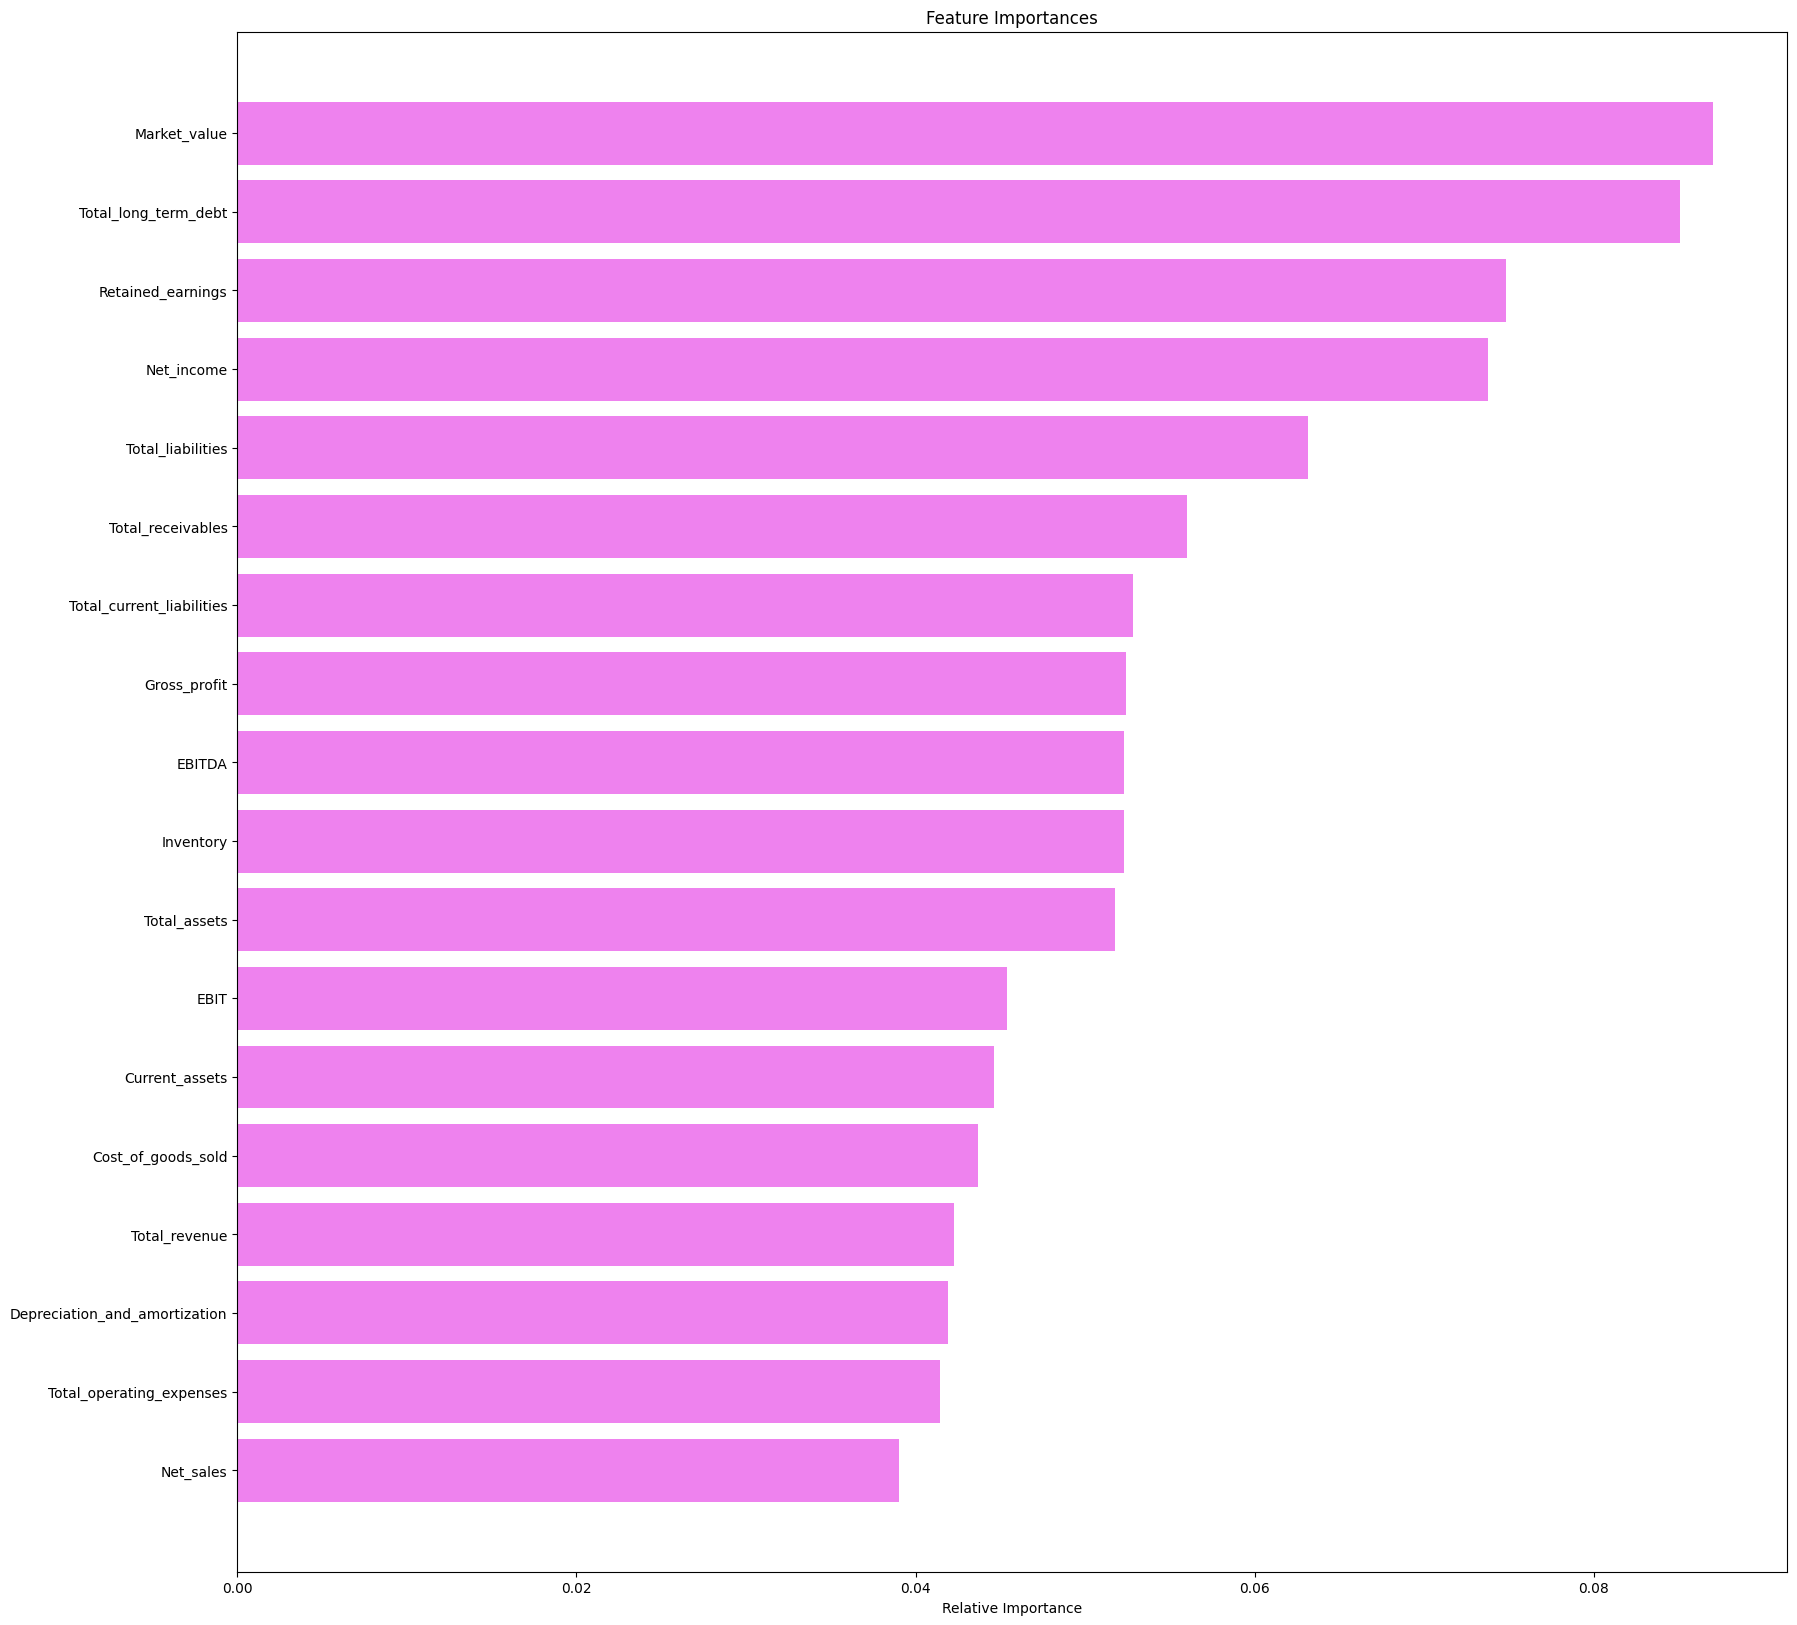

In [ ]:
# Uncomment and run to check feature importance for Improved Random Forest model

feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations

1.Market Value:
• Insight: “Market Value” is the most significant predictor of bankrupt.
• Recommendation: Regularly project and analyse future maket value to ensure financial stability. Focus on strategies that enhance market value, such as reinvesting profits, reducing liabilities, and increasing assets.

2.Total Long Term Debt & Total Liabilities:
• Insight: : A higher ratio indicates higher financial  risk.
• Recommendation: Regularly project and analyse long term debt and Focus on strategies that reduce long term debt.

3.Retained Earning and Net Income:
• Insight: : This ratio measures profitability relative to net worth.
• Recommendation: Enhance profitability by implementing cost-saving measures, optimizing pricing strategies, and exploring new business opportunities. Continuously monitor this ratio to ensure sustainable growth

4.Total Liabilities and Total Current liabilities
• Insight: : This is to measure risk.
• Recommendation: this ratio is also a significant predictor. It measures a company’s leverage and financial risk, where higher values may indicate higher default risk.

5.Total Assets and Current Assets
• Insight: : Strong Assets indicate financial stability
• Recommendation: highlighting the importance of liquidity and current assets in assessing financial stability. Total Assets reflects the company’s ability to generate cash from operations.

6.Total Revenue and Net Sales
• Insight: : To measures liquidity and the ability to cover total revenue and net sales.
• Recommendation: Develop and execute strategies to increase sales through targeted marketing campaigns, diversification of product offerings, or entering new markets. Expanding revenue streams can provide a more stable financial foundation.


___